**IRIS Dataset**

In [35]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, confusion_matrix, roc_auc_score
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import label_binarize
from sklearn.metrics import roc_curve, auc

In [7]:
import pandas as pd


df_iris = pd.read_csv('/content/sample_data/iris(1).csv')
display(df_iris.head())

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


In [8]:
import matplotlib.pyplot as plt
import seaborn as sns

print("Shape of the DataFrame:", df_iris.shape)

print("\nMissing Values:\n", df_iris.isnull().sum())

print("\nDescriptive Statistics:\n", df_iris.describe())


Shape of the DataFrame: (150, 5)

Missing Values:
 sepal_length    0
sepal_width     0
petal_length    0
petal_width     0
species         0
dtype: int64

Descriptive Statistics:
        sepal_length  sepal_width  petal_length  petal_width
count    150.000000   150.000000    150.000000   150.000000
mean       5.843333     3.054000      3.758667     1.198667
std        0.828066     0.433594      1.764420     0.763161
min        4.300000     2.000000      1.000000     0.100000
25%        5.100000     2.800000      1.600000     0.300000
50%        5.800000     3.000000      4.350000     1.300000
75%        6.400000     3.300000      5.100000     1.800000
max        7.900000     4.400000      6.900000     2.500000


In [18]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder

X = df_iris.drop('species', axis=1)
y = df_iris['species']

le = LabelEncoder()

y = le.fit_transform(y)


In [10]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [11]:
from sklearn import svm

svm_rbf = svm.SVC(kernel='rbf')
svm_linear = svm.SVC(kernel='linear')

svm_rbf.fit(X_train, y_train)
svm_linear.fit(X_train, y_train)

SVC(kernel='linear')

Accuracy of SVM with RBF kernel: 1.0
Confusion Matrix of SVM with RBF kernel:



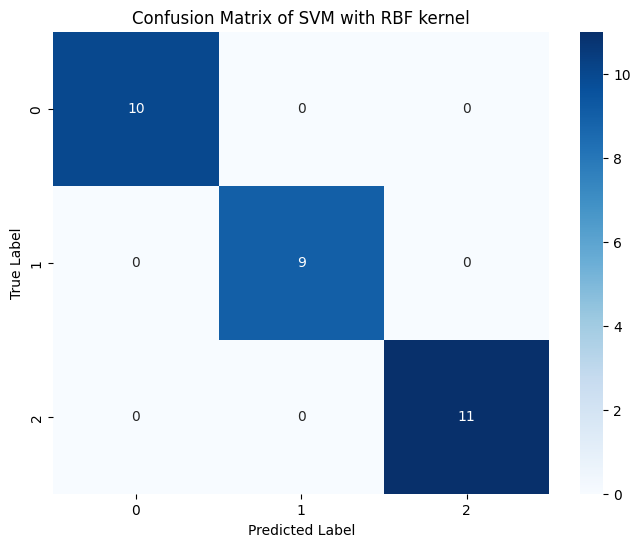



Accuracy of SVM with Linear kernel: 1.0
Confusion Matrix of SVM with Linear kernel:


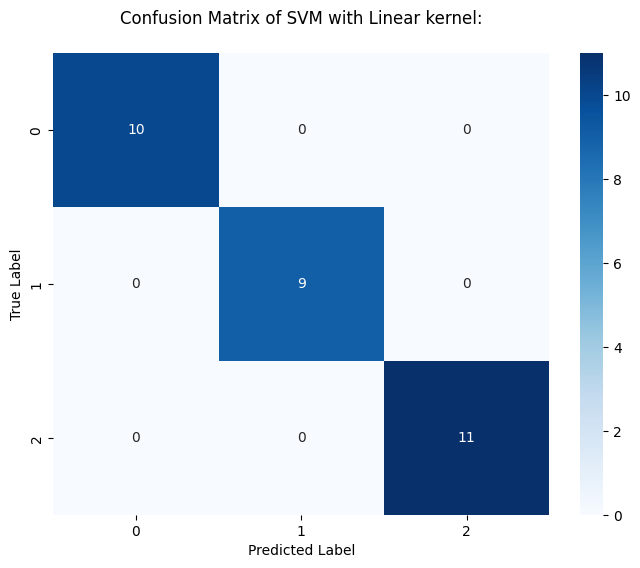

In [16]:
from sklearn.metrics import accuracy_score, confusion_matrix

y_pred_rbf = svm_rbf.predict(X_test)
y_pred_linear = svm_linear.predict(X_test)

accuracy_rbf = accuracy_score(y_test, y_pred_rbf)
accuracy_linear = accuracy_score(y_test, y_pred_linear)

cm_rbf = confusion_matrix(y_test, y_pred_rbf)
cm_linear = confusion_matrix(y_test, y_pred_linear)

print(f"Accuracy of SVM with RBF kernel: {accuracy_rbf}")
print(f"Confusion Matrix of SVM with RBF kernel:\n")
plt.figure(figsize=(8, 6))
sns.heatmap(cm_rbf, annot=True, cmap="Blues", fmt="d")
plt.title("Confusion Matrix of SVM with RBF kernel")
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.show()
print(f"\n\nAccuracy of SVM with Linear kernel: {accuracy_linear}")
print(f"Confusion Matrix of SVM with Linear kernel:")

plt.figure(figsize=(8, 6))
sns.heatmap(cm_linear, annot=True, cmap="Blues", fmt="d")
plt.title("Confusion Matrix of SVM with Linear kernel:\n")
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.show()

**Letter Recognition Dataset**

In [32]:
import pandas as pd
letters = pd.read_csv('/content/sample_data/letter-recognition.csv')
display(letters.head())

,letter,xbox,ybox,width,height,onpix,xbar,ybar,x2bar,y2bar,xybar,x2ybar,xy2bar,xedge,xedgey,yedge,yedgex
0,T,2,8,3,5,1,8,13,0,6,6,10,8,0,8,0,8
1,I,5,12,3,7,2,10,5,5,4,13,3,9,2,8,4,10
2,D,4,11,6,8,6,10,6,2,6,10,3,7,3,7,3,9
3,N,7,11,6,6,3,5,9,4,6,4,4,10,6,10,2,8
4,G,2,1,3,1,1,8,6,6,6,6,5,9,1,7,5,10


In [40]:
import matplotlib.pyplot as plt
import seaborn as sns

print("Shape of the DataFrame:", letters.shape)

print("\nInfo:")
letters.info()

print("\nDescriptive Statistics:")
print(letters.describe())


Shape of the DataFrame: (20000, 17)

Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20000 entries, 0 to 19999
Data columns (total 17 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   letter  20000 non-null  object
 1   xbox    20000 non-null  int64 
 2   ybox    20000 non-null  int64 
 3   width   20000 non-null  int64 
 4   height  20000 non-null  int64 
 5   onpix   20000 non-null  int64 
 6   xbar    20000 non-null  int64 
 7   ybar    20000 non-null  int64 
 8   x2bar   20000 non-null  int64 
 9   y2bar   20000 non-null  int64 
 10  xybar   20000 non-null  int64 
 11  x2ybar  20000 non-null  int64 
 12  xy2bar  20000 non-null  int64 
 13  xedge   20000 non-null  int64 
 14  xedgey  20000 non-null  int64 
 15  yedge   20000 non-null  int64 
 16  yedgex  20000 non-null  int64 
dtypes: int64(16), object(1)
memory usage: 2.6+ MB

Descriptive Statistics:
              xbox          ybox         width        height        onpix   \
count  200

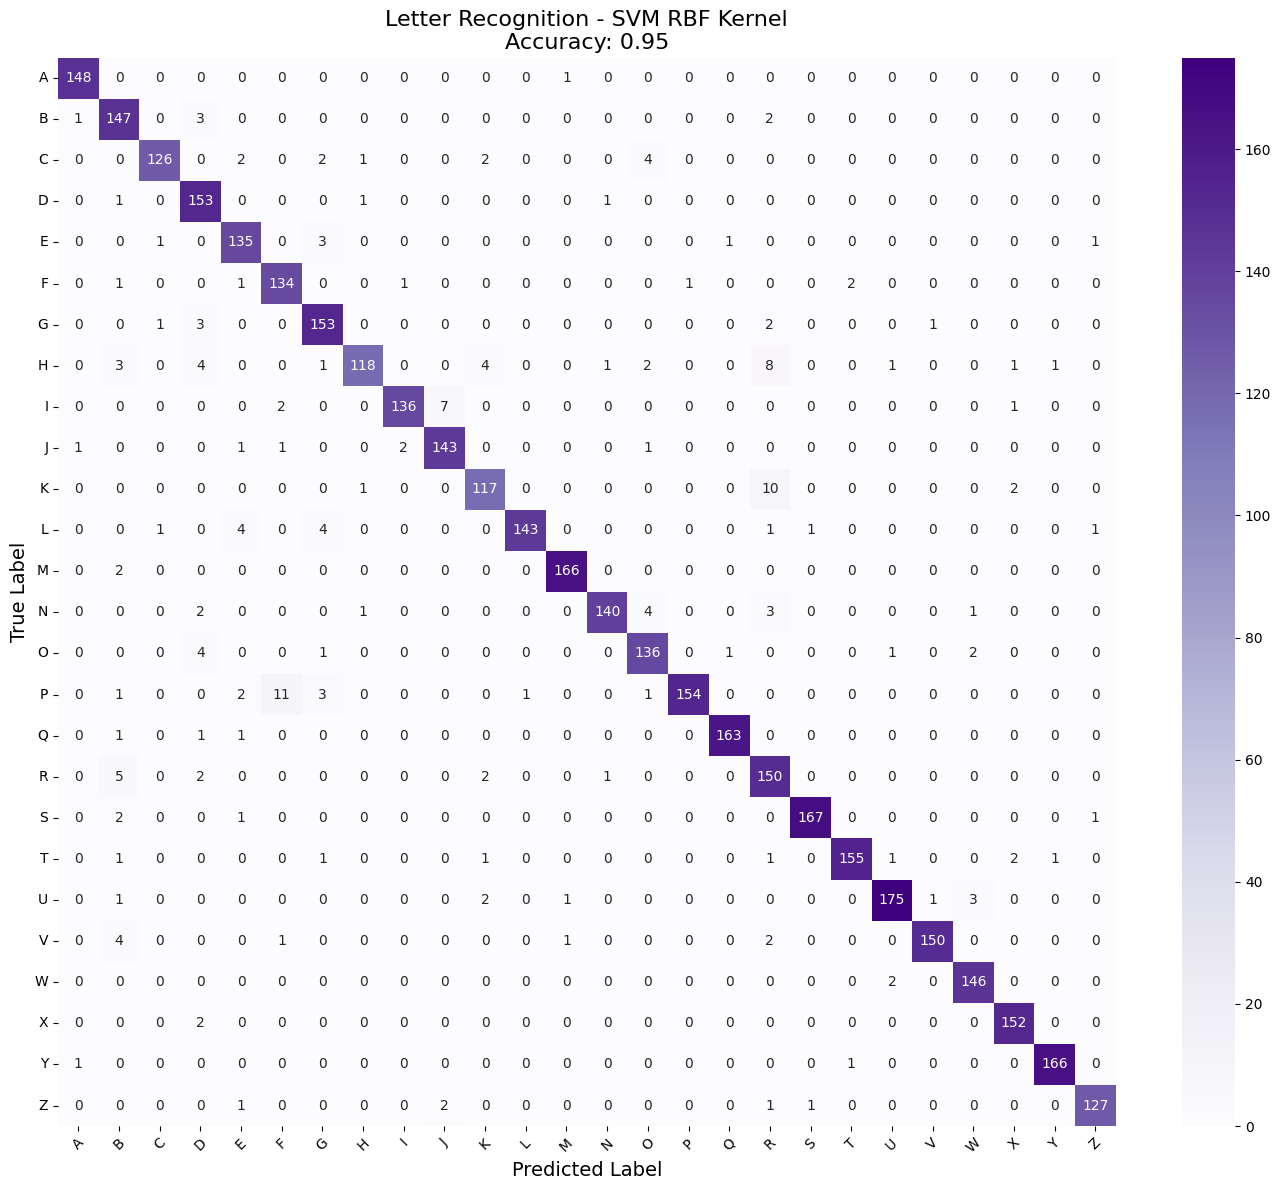

In [39]:
X_letters = letters.drop('letter', axis=1)
y_letters = letters['letter']

label_encoder_letters = LabelEncoder()
y_letters_encoded = label_encoder_letters.fit_transform(y_letters)
class_names_letters = label_encoder_letters.classes_

X_train_letters, X_test_letters, y_train_letters, y_test_letters = train_test_split(X_letters, y_letters_encoded, test_size=0.2, random_state=42)

scaler_letters = StandardScaler()
X_train_letters = scaler_letters.fit_transform(X_train_letters)
X_test_letters = scaler_letters.transform(X_test_letters)

svm_letters = SVC(kernel='rbf', probability=True)
svm_letters.fit(X_train_letters, y_train_letters)
y_pred_letters = svm_letters.predict(X_test_letters)

acc_letters = accuracy_score(y_test_letters, y_pred_letters)
cm_letters = confusion_matrix(y_test_letters, y_pred_letters)

plt.figure(figsize=(14, 12))
sns.heatmap(cm_letters, annot=True, fmt='d', cmap='Purples',
            xticklabels=class_names_letters,
            yticklabels=class_names_letters,
            cbar=True)

plt.title(f'Letter Recognition - SVM RBF Kernel\nAccuracy: {acc_letters:.2f}', fontsize=16)
plt.xlabel("Predicted Label", fontsize=14)
plt.ylabel("True Label", fontsize=14)
plt.xticks(rotation=45)
plt.yticks(rotation=0)
plt.tight_layout()
plt.show()


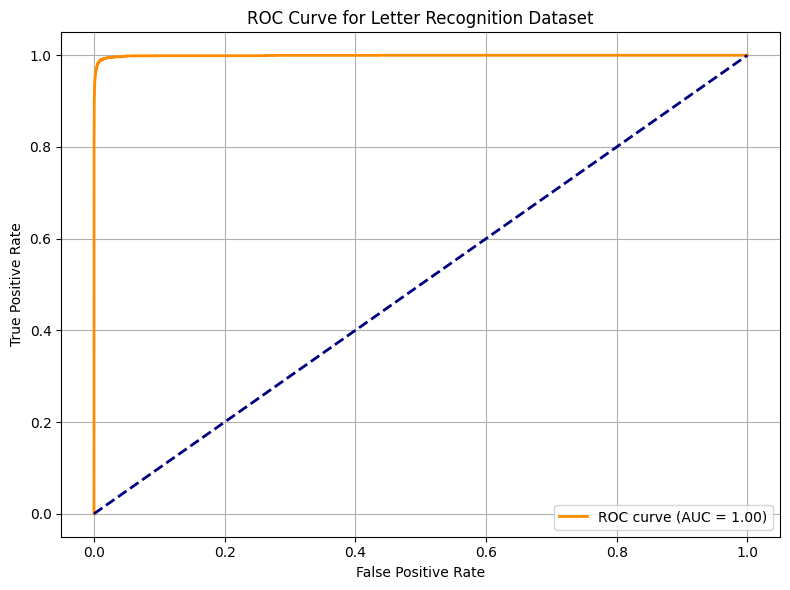

In [38]:
y_test_binarized = label_binarize(y_test_letters, classes=np.unique(y_letters_encoded))
y_score = svm_letters.predict_proba(X_test_letters)
fpr, tpr, _ = roc_curve(y_test_binarized.ravel(), y_score.ravel())
auc_score = roc_auc_score(y_test_binarized, y_score, average='macro')

plt.figure(figsize=(8,6))
plt.plot(fpr, tpr, color='darkorange', lw=2, label=f'ROC curve (AUC = {auc_score:.2f})')
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC Curve for Letter Recognition Dataset")
plt.legend(loc="lower right")
plt.grid()
plt.tight_layout()
plt.show()